# Principal Component Analysis
Performs PCA on actual financial data from some shares that make up the DJIA.

In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt
from pandas_datareader import data

In [2]:
tickers = ['AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS'] # Stocks to retreive

In [3]:
panel_data = data.DataReader(tickers, 'iex', '2014-01-01', '2019-01-01') # Get data

In [4]:
close = panel_data['close'] # Only interested in closing prices

In [5]:
close.describe()

Symbols,AXP,BA,CAT,CSCO,CVX,DIS
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,79.701393,187.791247,96.568637,30.047868,97.726679,98.980155
std,14.283056,88.316129,29.622145,7.735951,14.135911,9.497252
min,48.475700,99.925700,52.802700,19.770500,60.127600,76.146100
25%,70.228000,120.981600,73.138500,24.314200,89.189900,92.966700
50%,77.261500,135.437600,88.229500,28.032800,97.379500,100.205400
75%,90.363300,253.460400,122.731700,32.795900,108.284100,106.286400
max,112.033300,386.325100,165.848700,48.130200,126.115900,117.984800


In [6]:
Z = close.corr().values # Get correlation matrix as a numpy array
vals = np.linalg.eigvals(Z) # Find eigenvalues

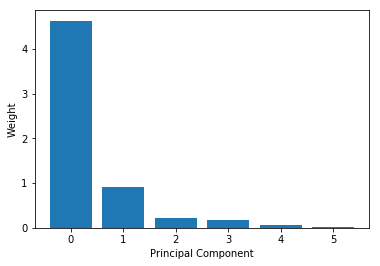

In [7]:
# Plot magnitudes of eigenvalues as a bar chart
plt.bar(np.arange(len(tickers)), vals)
plt.xlabel('Principal Component')
plt.ylabel('Weight');

In [19]:
# Calculate PCs
T, P = qf.pca.pca(close.values, epsilon=1e-15)
print(T)
print(P)

[[-1.47742639 -2.341538   -0.24534339  0.05596221  0.0349113  -0.11080378]
 [-1.42030151 -2.26664135 -0.29175147  0.04723966  0.01519526 -0.08866502]
 [-1.33926945 -2.25116062 -0.43660902  0.09521392  0.05940323 -0.07840809]
 ..., 
 [ 2.66365662  0.40907508  0.17248668  0.43997105  0.26487238 -0.01294126]
 [ 2.63116909  0.50383136  0.14732613  0.43015173  0.25703615 -0.02031283]
 [ 2.80935078  0.70501785  0.09206453  0.3906598   0.23344684 -0.01203967]]
[[ 0.41413447 -0.22798236 -0.83192406  0.16668868  0.2267698   0.07217603]
 [ 0.45267389  0.08631427  0.18371436  0.39663605 -0.1143696  -0.76386168]
 [ 0.44596626 -0.20430651  0.13074928  0.08815706 -0.74166312  0.42946678]
 [ 0.43977631  0.18362346  0.41829905  0.27490983  0.57432504  0.43872595]
 [ 0.40508898 -0.38081253  0.18637941 -0.76719042  0.18360449 -0.18399918]
 [ 0.25921574  0.84858528 -0.21758821 -0.37810912 -0.14788852  0.02297979]]
